**UNIT - Curso de Computação**

**Processamento de Imagens de Computação Gráfica**

Profª. Layse Santos Souza

#**Introdução ao processamento de imagens**

Carregar as bibliotecas necessárias: **numpy**, **pandas**, **cv2**, **skimage** e **matplotlib**


*   [Numpy](https://www.numpy.org/) é uma biblioteca de manipulação de arrays multidimensionais.
*   [Pandas](https://pandas.pydata.org/) é uma biblioteca para manipulação e análise de dados.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) é uma biblioteca para visão computacional.
*   [Skimage](https://scikit-image.org/) é uma biblioteca que suporta o processamento de imagens em Python.
*   [Matplotlib](https://matplotlib.org/) é uma biblioteca que gera figuras e fornece um kit de ferramentas de interface gráfica do usuário.

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # para exibir a imagem
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

Ler uma imagem de url e exibi-lá usando openCV

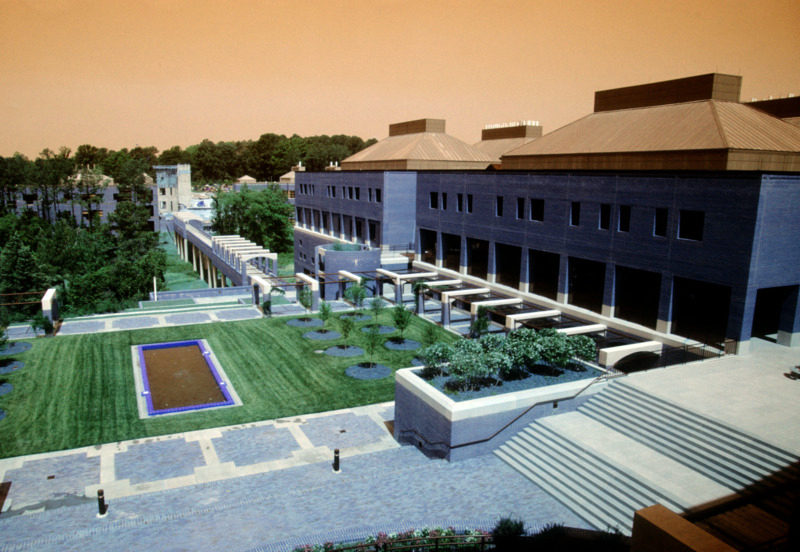

In [2]:
imageurl = "https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg" # Carrega imagem
image = io.imread(imageurl) # Lê imagem
cv2_imshow(image) #Exibe imagem

Código para visualizar a imagem

In [3]:
print(image.shape)
print(image[150,150])

(552, 800, 3)
[25 61 75]


In [12]:
# Outra forma é capturar os dados em variáveis separadas da imagem RGB melhorada
(h, w, c) = image.shape
print("Largura: {} pixels".format(w))
print("Altura: {}  pixels".format(h))
print("Canais: {}".format(c))

Largura: 800 pixels
Altura: 552  pixels
Canais: 3


Conferir as cores do pixel

In [4]:
print(image[0,0])

[ 86 152 210]


In [5]:
print(image)

[[[ 86 152 210]
  [ 90 155 213]
  [ 92 157 215]
  ...
  [ 50 115 181]
  [ 47 115 180]
  [ 45 113 178]]

 [[ 89 154 212]
  [ 90 155 213]
  [ 90 155 213]
  ...
  [ 49 114 178]
  [ 48 113 177]
  [ 45 113 178]]

 [[ 88 153 211]
  [ 89 154 212]
  [ 88 153 211]
  ...
  [ 48 114 175]
  [ 48 114 175]
  [ 48 114 175]]

 ...

 [[160 134 111]
  [166 143 135]
  [174 158 145]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[161 128 111]
  [167 143 131]
  [167 154 135]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[156 118 105]
  [164 136 122]
  [160 149 121]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


Usando escala de cinza

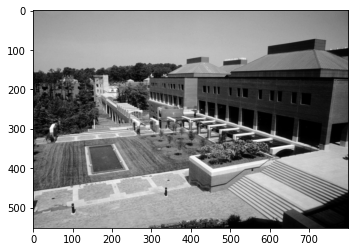

(552, 800)


In [6]:
from skimage.color import rgb2gray, rgb2gray # calcula a luminância de uma imagem RGB

#Converter imagem para o espaço de cor grayscale
img_gray = rgb2gray(image)
plt.imshow(img_gray, cmap = 'gray')
plt.show()
print(img_gray.shape)

Exemplo RGB/Exibindo um pixel

In [8]:
print(img_gray) #Imprime a matriz da imagem e cada elemento representa um pixel

[[0.55747765 0.57007569 0.57791882 ... 0.4154749  0.41269216 0.40484902]
 [0.56615412 0.57007569 0.57007569 ... 0.41098784 0.40706627 0.40484902]
 [0.56223255 0.56615412 0.56223255 ... 0.40930627 0.40930627 0.40930627]
 ...
 [0.54065373 0.57768902 0.62926549 ... 0.         0.         0.        ]
 [0.52465412 0.57739137 0.60938275 ... 0.         0.         0.        ]
 [0.49073608 0.55270824 0.58556353 ... 0.         0.         0.        ]]


In [9]:
print(img_gray.shape) # exibe altura, largura e canais da imagem RGB melhorada
print(img_gray[1,1]) # [x,y]

(552, 800)
0.5700756862745098


**Etapa6:** Exemplo Matriz, Saturação, Valor (HSV)

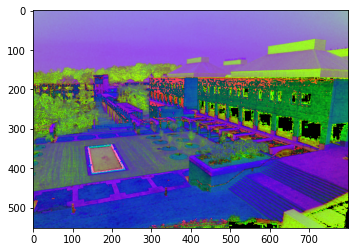

(552, 800, 3)
[0.54666667 0.66666667 0.29411765]


In [10]:
from skimage.color import convert_colorspace # converte uma matriz de imagens em um novo espaço de cores

#Converter imagem para o espaço de cor HSV
img_hsv = convert_colorspace(image, 'RGB', 'HSV')

plt.imshow(img_hsv)
plt.show()

print(img_hsv.shape)
print(img_hsv[150,150]) # rgb

**Etapa7:** Preto e Branco na prática

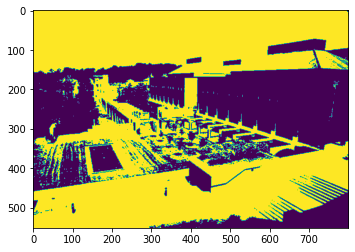

In [11]:
# Método de Otsu -> a partir de uma imagem em tons de cinza, determinar o valor ideal de um threshold (limiar) 
# que separa os elementos do fundo e da frente da imagem em dois clusters,
# atribuindo a cor branca ou preta para cada um deles
# Cada pixel é visto como um cluster, e clusters são unidos até formarem um bom cluster

from skimage.filters import threshold_otsu # Valor limite de retorno baseado no método de Otsu

img_gray = rgb2gray(image)

thresh = threshold_otsu(img_gray) #Converter imagem para o espaço de cor grayscale
binary_thresh_img = img_gray > thresh
plt.imshow(binary_thresh_img)
plt.show()

Redimensionar e rotacionar uma imagem

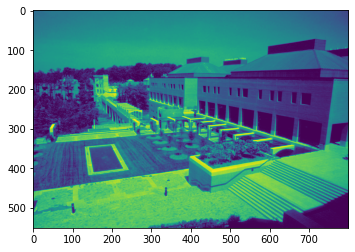

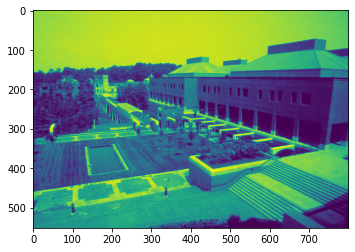

maximo de pixels:
255
minimo de pixels:
0
Media de pixels:
126.01302536231884


In [28]:
# resize -> Redimensiona a imagem para corresponder a um determinado tamanho
# rotate -> Rotaciona a imagem

from skimage.transform import resize, rotate

img_r = image[:, :, 0]
plt.imshow(img_r)
plt.show()

img_g = image[:, :, 2]
plt.imshow(img_g)
plt.show()

print("maximo de pixels:")
print(img_g.max())

print("minimo de pixels:")
print(img_g.min())

print("Media de pixels:")
print(img_g.mean())

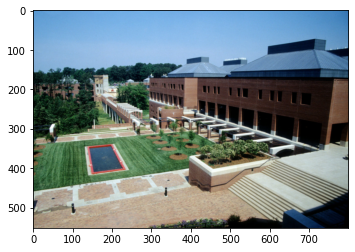

In [24]:
plt.imshow(image)
plt.show()

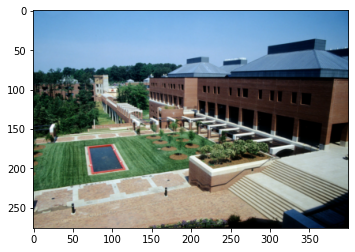

In [23]:
a,l,c = image.shape
img_red = resize(image, (int(a / 2), int(l / 2)))
plt.imshow(img_red)
plt.show()

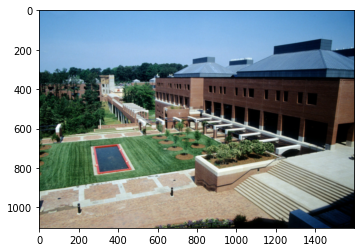

In [18]:
img_red2 = resize(image, (int(a * 2), int(l * 2)))
plt.imshow(img_red2)
plt.show()

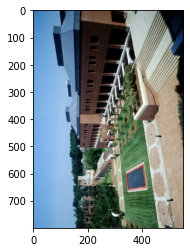

In [19]:
img_rot = rotate(image, 90, resize=True)
plt.imshow(img_rot)
plt.show()

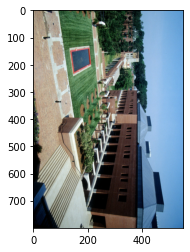

In [20]:
img_rot = rotate(image, -90, resize=True)
plt.imshow(img_rot)
plt.show()

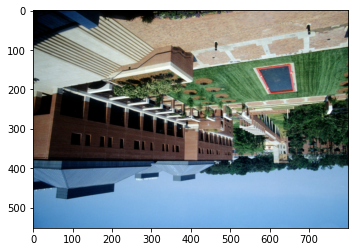

In [21]:
img_rot = rotate(image, 180, resize=True)
plt.imshow(img_rot)
plt.show()